What is the Bloch Sphere?

The Bloch sphere is a 3D unit sphere used to depict the quantum state of a single qubit. Unlike a multi-qubit register (which lives in a higher-dimensional space), a single qubit’s state can be fully described by two real parameters (angles) on this sphere, thanks to normalization and global phase irrelevance.

Why a Sphere?: A qubit’s state 

wave function

∣ψ⟩=α∣0⟩+β∣1⟩ (with 

∣α∣^
2
 +∣β∣^ 
2
 =1) maps to a point on or inside a unit sphere, where 
𝛼
α and 
𝛽
β are complex numbers constrained by this normalization.

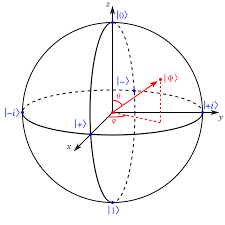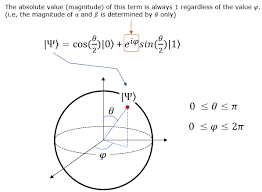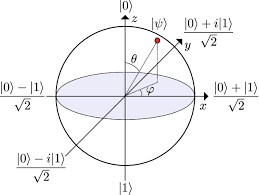

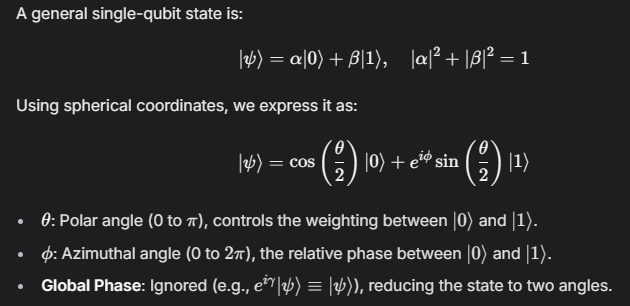

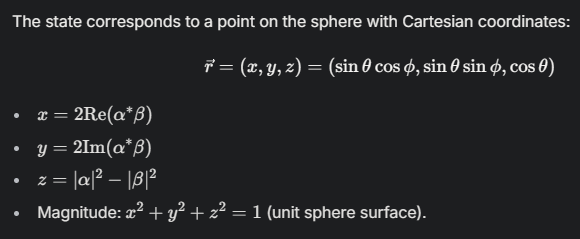

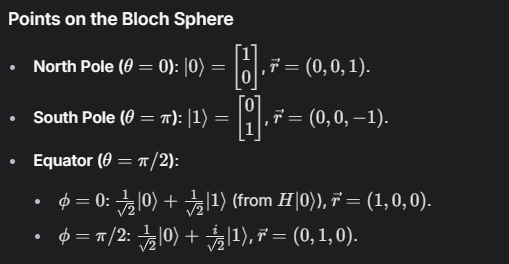

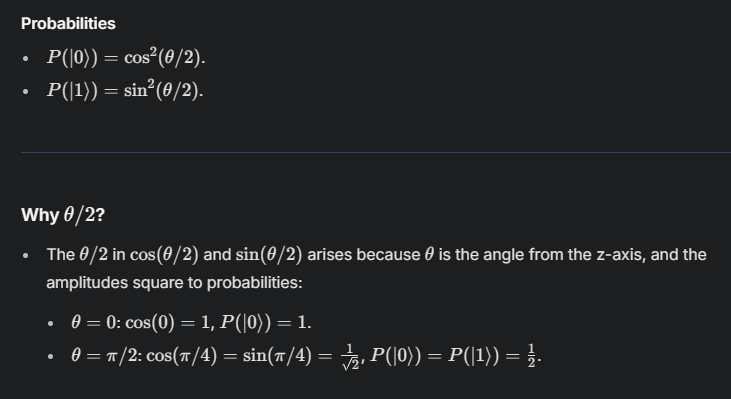

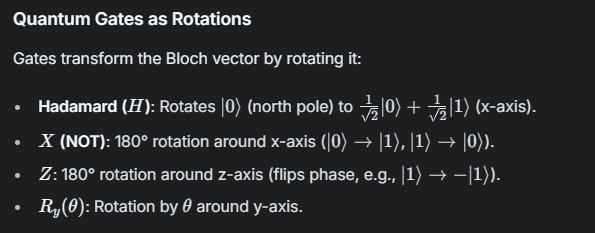

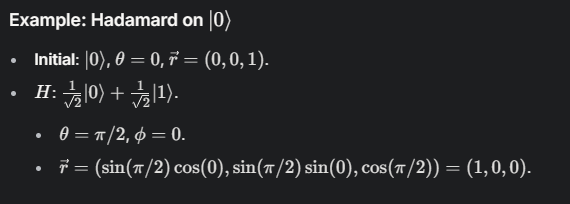

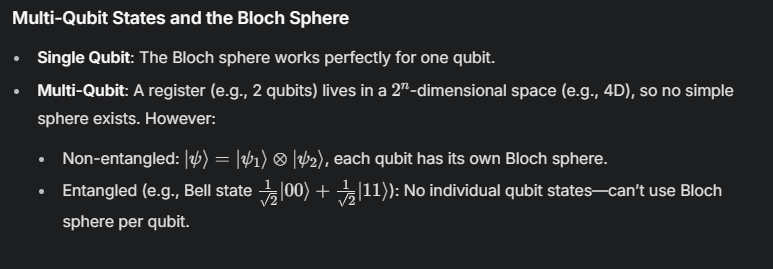

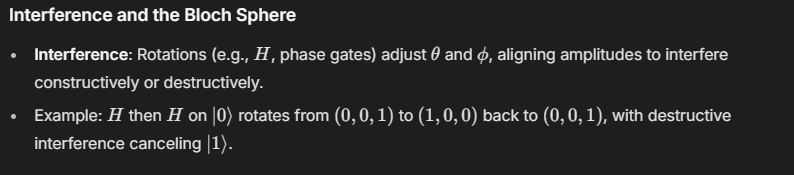

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

Initialize: Qubit starts at ∣0⟩.= [1 0]

In [ ]:
qr = QuantumRegister(1) # Creates a quantum register with 1 qubit (quantum bit) |0> = [1 0]
cr = ClassicalRegister(1) # Creates a classical register with 1 bit (classical bit).
circuit = QuantumCircuit(qr, cr) # Creates a quantum circuit with the specified quantum register

A 1-qubit circuit with 1 classical bit is the simplest meaningful quantum system:

1 Qubit: A quantum register with a wave function 

∣ψ⟩=α∣0⟩+β∣1⟩, manipulable via gates (e.g., H,X).

1 Classical Bit: Stores the measurement outcome (0 or 1) after collapsing the qubit’s state.

In [ ]:
# pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [8]:
from qiskit_aer import Aer

In [11]:
from qiskit_aer import AerSimulator

In [ ]:
# simulator = AerSimulator()
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result() # Initialize: Qubit starts at ∣0⟩.= [1 0]
print(sim_result)

Result(backend_name='statevector_simulator', backend_version='0.13.3', qobj_id='', job_id='a7c54f23-37b1-47b0-9b98-3abd9cc062d8', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1}, statevector=Statevector([1.+0.j, 0.+0.j],
            dims=(2,))), header=QobjExperimentHeader(creg_sizes=[['c0', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-157', qreg_sizes=[['q0', 1]], metadata={}), status=DONE, seed_simulator=136681565, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'time_taken': 0.0370065, 'input_qubit_map': [[0, 0]], 'max_memory_mb': 8072, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qub

In [16]:
statevector = sim_result.get_statevector()

In [17]:
statevector

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [ ]:
array_to_latex(statevector) # |0>

<IPython.core.display.Latex object>

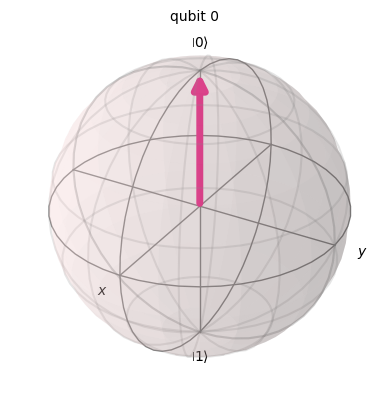

In [19]:
plot_bloch_multivector(statevector)

Apply 
𝐻
H Gate: Creates superposition 



In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr) # apply H to qr ckt

In [21]:
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result() # 
print(sim_result)

Result(backend_name='statevector_simulator', backend_version='0.13.3', qobj_id='', job_id='655e5b12-3843-4a8e-bd78-e3fd64c3ffc6', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1}, statevector=Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))), header=QobjExperimentHeader(creg_sizes=[['c1', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-165', qreg_sizes=[['q2', 1]], metadata={}), status=DONE, seed_simulator=2699951144, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'time_taken': 0.0085509, 'input_qubit_map': [[0, 0]], 'max_memory_mb': 8072, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': True, 'threshold': 1

In [22]:
statevector = sim_result.get_statevector()

In [23]:
statevector

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [25]:
array_to_latex(statevector)

<IPython.core.display.Latex object>

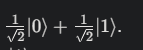


= 1/2^0.5([1 0]) + 1/2^0.5([0 1])

= [1/2^0.5 0] + [0 1/2^0.5]

= [1/2^0.5 1/2^0.5]

= [ 2^0.5/2  2^0.5/2] 

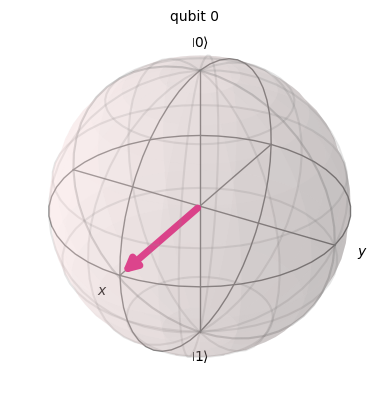

In [24]:
plot_bloch_multivector(statevector)

Measure: Collapses the state to 
∣0⟩ or 
∣1⟩, storing the result in the classical bit.

Measurement:
Collapses to 
∣0⟩ or 
∣1⟩, storing 0 or 1 in the classical bit.
Probability: 
P(∣0⟩)=P(∣1⟩)= 1/2


In [27]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr)
circuit.measure(qr, cr)

In [28]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result() 
print(sim_result)

Result(backend_name='statevector_simulator', backend_version='0.13.3', qobj_id='', job_id='13c062a7-e4f0-4a17-abee-12a4bd384c49', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1}, statevector=Statevector([0.+0.j, 1.+0.j],
            dims=(2,))), header=QobjExperimentHeader(creg_sizes=[['c2', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-167', qreg_sizes=[['q3', 1]], metadata={}), status=DONE, seed_simulator=2495772152, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'time_taken': 0.0542583, 'input_qubit_map': [[0, 0]], 'max_memory_mb': 8072, 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_q

In [29]:
statevector  = sim_result.get_statevector()

In [30]:
statevector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [ ]:
array_to_latex(statevector) # |1>

<IPython.core.display.Latex object>

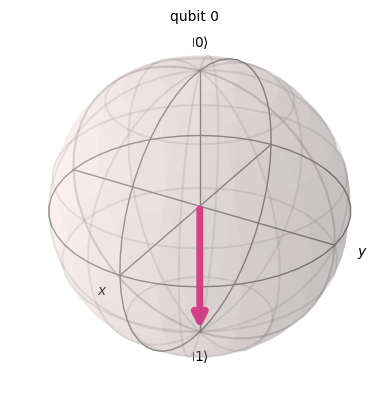

In [32]:

plot_bloch_multivector(statevector)